# K近邻法
    一种分类算法

**算法**
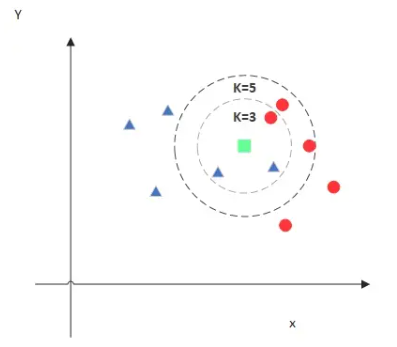

* 通过一定的策略，设置K的值，找到距离待分类点最近的K个点，通过多数表决规则，确定待分类点的类型

**距离度量**
$$L_p(\mathbf{x}_i, \mathbf{x}_j) = \left( \sum_{l=1}^{n} \left| x_i^{(l)} - x_j^{(l)} \right|^p \right)^{1/p}$$
      
* p = 1 曼哈顿距离
* p = 2 欧几里得距离
* p = inf 闵式距离


**python实现距离度量**

In [1]:
import numpy as np

def lp_distance(Xi, Xj, p=2):
    """
    计算Lp距离
    :param Xi: 第一个向量
    :param Xj: 第二个向量
    :param p: 距离的幂次（默认为2，即欧几里得距离）
    :return: Lp距离
    """
    if len(Xi) != len(Xj):
        raise ValueError("输入向量的长度不一致")

    distance = np.sum(np.abs(Xi - Xj) ** p) ** (1/p)
    return distance

# 示例使用
Xi = np.array([1, 2, 3])
Xj = np.array([4, 5, 6])
p = 2  # 欧几里得距离
distance = lp_distance(Xi, Xj, p)
print(f"L{p}距离: {distance}")


L2距离: 5.196152422706632


**np集成**

In [2]:
x = np.array([
    [1, 2, 3],
    [4, 5, 6]])

print ("矩阵2范数：",np.linalg.norm(x[0] - x[1],ord=2,keepdims=True))


矩阵2范数： [5.19615242]


**K值的选择**

* 通过交叉验证，将样本数据按照一定比例，拆分出训练集和验证集。
* 从选取一个较小的K值开始，不断增加K的值，然后计算验证集的方差，最终找到一个比较适合的K值
    
    

**python搭建**

In [3]:
import numpy as np
import pandas as pd
from collections import Counter
# 鸢尾花数据集
from sklearn.datasets import load_iris
# 划分数据集的库
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
# data = np.array(df.iloc[:100, [0, 1, -1]])

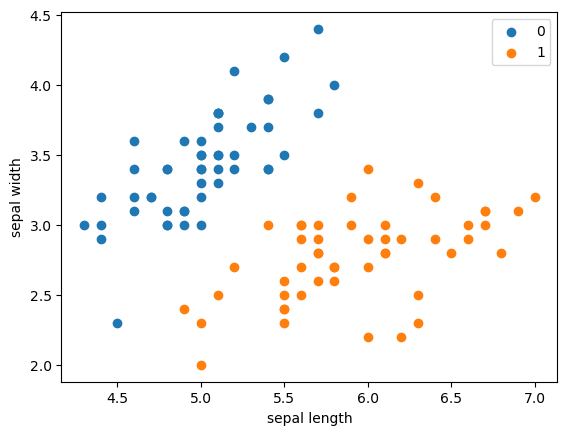

In [5]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [6]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
# 划分数据集 test_size=0.2表示测试集占20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        """
            parameter: n_neighbors 临近点的个数
            parameter: p 距离度量
        """
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X):
        knn_list = []
        # 计算了测试样本 X 与前n个训练样本之间的距离
        for i in range(self.n):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))
            
        for i in range(self.n, len(self.X_train)):
            # 距离最大的元素的索引，即距离最远的训练样本的索引
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            # 保持 knn_list 中存储的最近的 n 个训练样本
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])
        
        # 从knn_list中提取每个近邻的类别标签
        knn = [k[-1] for k in knn_list]
        # 计算每个类别标签出现次数
        count_pairs = Counter(knn)
        # 排序 key=lambda x: x 意味着排序的依据是键本身（类别标签）,最后取出-1（最后一个）即为次数最多的标签
        max_count = sorted(count_pairs, key=lambda x:x)[-1]
        return max_count
        
    def score(self, X_test, y_test):
        right_count = 0
        n = 10
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [8]:
clf = KNN(X_train, y_train)

In [9]:
clf.score(X_test, y_test)

0.95

In [10]:
test_point = [5.0, 3.0]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 0.0


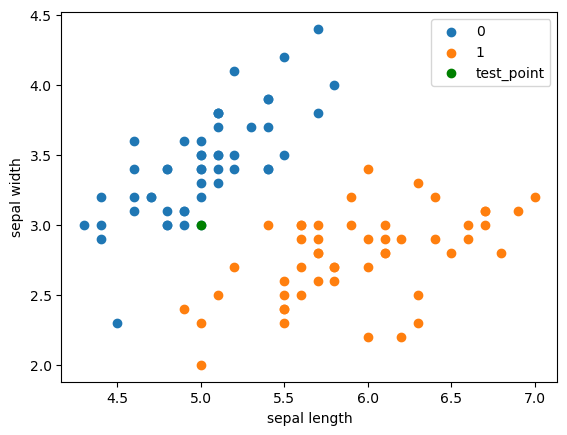

In [11]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'go', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

**sklearn**

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
clf_sk = KNeighborsClassifier()
print(clf_sk.get_params())
clf_sk.fit(X_train, y_train)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


KNeighborsClassifier()

In [14]:
clf_sk.score(X_test, y_test)

0.95

In [15]:
test_point = [6.0, 3.0]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 1.0


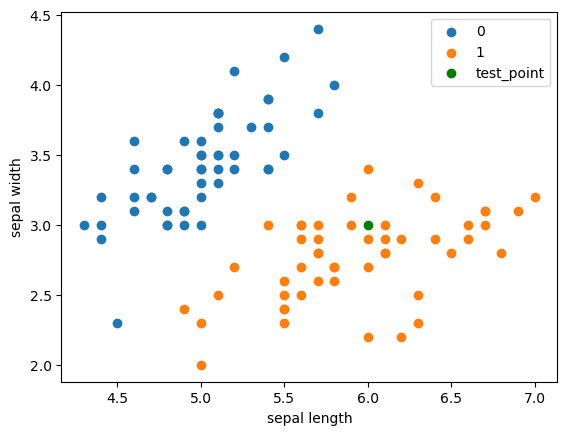

In [16]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'go', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()